In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [239]:
loans = pd.read_csv('data/loans.csv.gz')

In [240]:
loans.columns

Index(['addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'delinq_amnt', 'desc',
       'disbursement_method', 'dti', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership',
       'initial_list_status', 'installment', 'int_rate', 'issue_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'term', 'title',
       'total_pymnt', 'total_pymnt_inv', 'verification_status'],
      dtype='object')

In [241]:
loans.isnull().sum()

addr_state                      0
annual_inc                      0
application_type                0
chargeoff_within_12_mths       56
delinq_amnt                     0
desc                        12967
disbursement_method             0
dti                             0
emp_length                   1078
emp_title                    2467
funded_amnt                     0
funded_amnt_inv                 0
grade                           0
hardship_flag                   0
home_ownership                  0
initial_list_status             0
installment                     0
int_rate                        0
issue_d                         0
last_pymnt_amnt                 0
last_pymnt_d                   71
loan_amnt                       0
loan_status                     0
pub_rec_bankruptcies          697
purpose                         0
pymnt_plan                      0
term                            0
title                          11
total_pymnt                     0
total_pymnt_in

In [242]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 31 columns):
addr_state                  39785 non-null object
annual_inc                  39785 non-null float64
application_type            39785 non-null object
chargeoff_within_12_mths    39729 non-null float64
delinq_amnt                 39785 non-null int64
desc                        26818 non-null object
disbursement_method         39785 non-null object
dti                         39785 non-null float64
emp_length                  38707 non-null object
emp_title                   37318 non-null object
funded_amnt                 39785 non-null int64
funded_amnt_inv             39785 non-null float64
grade                       39785 non-null object
hardship_flag               39785 non-null object
home_ownership              39785 non-null object
initial_list_status         39785 non-null object
installment                 39785 non-null float64
int_rate                    39785 non-

In [243]:
for colname in loans: 
    print("---------")
    print(colname)
    print(loans[colname].head())

---------
addr_state
0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object
---------
annual_inc
0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64
---------
application_type
0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: application_type, dtype: object
---------
chargeoff_within_12_mths
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: chargeoff_within_12_mths, dtype: float64
---------
delinq_amnt
0    0
1    0
2    0
3    0
4    0
Name: delinq_amnt, dtype: int64
---------
desc
0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object
---------
disbursement_method
0    Cash
1    Cash
2    Cash
3    Cash
4    Cash
Name: disbursement_method, dtyp

In [244]:
loans.loc[210, "desc"]

nan

In [245]:
rejections = pd.read_csv('./data/rejections.csv.gz')

In [246]:
rejections['outcome'] = 0

In [247]:
rejections.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,State,Employment Length,outcome
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,MD,< 1 year,0


In [248]:
rejections_filtered = rejections[['Amount Requested', 'Application Date', 'Debt-To-Income Ratio', 'Loan Title', 'Employment Length', 'outcome']]

In [249]:
rejections_filtered.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Loan Title,Employment Length,outcome
0,1000.0,2007-05-26,10%,Wedding Covered but No Honeymoon,4 years,0
1,1000.0,2007-05-26,10%,Consolidating Debt,< 1 year,0
2,11000.0,2007-05-27,10%,Want to consolidate my debt,1 year,0
3,6000.0,2007-05-27,38.64%,waksman,< 1 year,0
4,1500.0,2007-05-27,9.43%,mdrigo,< 1 year,0


In [250]:
rejections.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'State', 'Employment Length', 'outcome'],
      dtype='object')

In [251]:
loans['outcome'] = 1

In [252]:
loans_filtered = loans[["loan_amnt", "issue_d", "dti", "title", "emp_length", "outcome"]]

In [253]:
loans_filtered.head()

,loan_amnt,issue_d,dti,title,emp_length,outcome
0,5000,Dec-2011,27.65,Computer,10+ years,1
1,2500,Dec-2011,1.00,bike,< 1 year,1
2,2400,Dec-2011,8.72,real estate business,10+ years,1
3,10000,Dec-2011,20.00,personel,10+ years,1
4,3000,Dec-2011,17.94,Personal,1 year,1


In [254]:
rejections_filtered.columns = ["loan_amnt", "issue_d", "dti", "title", "emp_length", "outcome"]

In [255]:
rejections_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755491 entries, 0 to 755490
Data columns (total 6 columns):
loan_amnt     755491 non-null float64
issue_d       755491 non-null object
dti           755491 non-null object
title         755477 non-null object
emp_length    747361 non-null object
outcome       755491 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 34.6+ MB


In [256]:
loans_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 6 columns):
loan_amnt     39785 non-null int64
issue_d       39785 non-null object
dti           39785 non-null float64
title         39774 non-null object
emp_length    38707 non-null object
outcome       39785 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ MB


In [257]:
loans_filtered['issue_d'] = pd.to_datetime(loans_filtered['issue_d'])
rejections_filtered['issue_d'] = pd.to_datetime(rejections_filtered['issue_d'])

/Users/lowthe01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lowthe01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [258]:
rejections_filtered.head()

,loan_amnt,issue_d,dti,title,emp_length,outcome
0,1000.0,2007-05-26,10%,Wedding Covered but No Honeymoon,4 years,0
1,1000.0,2007-05-26,10%,Consolidating Debt,< 1 year,0
2,11000.0,2007-05-27,10%,Want to consolidate my debt,1 year,0
3,6000.0,2007-05-27,38.64%,waksman,< 1 year,0
4,1500.0,2007-05-27,9.43%,mdrigo,< 1 year,0


In [259]:
def tidy_dti(dti): 
    if pd.isnull(dti): 
        return np.nan
    else: 
        return float(dti.replace("%", "").strip())
    
rejections_filtered['dti'] = rejections_filtered['dti'].apply(tidy_dti)

/Users/lowthe01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [260]:
def tidy_emp_length(emp_length): 
    if pd.isnull(emp_length): 
        return np.nan
    else: 
        emp_length = emp_length.lower()
        emp_length = re.sub("years?", "", emp_length)
        if emp_length.strip() == "< 1" or emp_length.strip() == "<1": 
            emp_length = "0"
        emp_length = re.sub(">|\+", "", emp_length).strip()
        return int(emp_length)
    
rejections_filtered['emp_length'] = rejections_filtered['emp_length'].apply(tidy_emp_length)

/Users/lowthe01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [261]:
loans_filtered['emp_length'] = loans_filtered['emp_length'].apply(tidy_emp_length)

/Users/lowthe01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [262]:
rejections_filtered.isnull().sum()

loan_amnt        0
issue_d          0
dti              0
title           14
emp_length    8130
outcome          0
dtype: int64

In [263]:
rejections_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755491 entries, 0 to 755490
Data columns (total 6 columns):
loan_amnt     755491 non-null float64
issue_d       755491 non-null datetime64[ns]
dti           755491 non-null float64
title         755477 non-null object
emp_length    747361 non-null float64
outcome       755491 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 34.6+ MB


In [264]:
loans_filtered.isnull().sum()

loan_amnt        0
issue_d          0
dti              0
title           11
emp_length    1078
outcome          0
dtype: int64

In [265]:
df = pd.concat([loans_filtered, rejections_filtered])

In [266]:
df.tail()

,loan_amnt,issue_d,dti,title,emp_length,outcome
755486,35000.0,2012-12-31,20.29,other,0.0,0
755487,3000.0,2012-12-31,6.75,other,0.0,0
755488,10000.0,2012-12-31,20.03,debt_consolidation,0.0,0
755489,25000.0,2012-12-31,44.59,debt_consolidation,0.0,0
755490,35000.0,2012-12-31,4.13,other,0.0,0


In [267]:
# df = pd.get_dummies(df, columns=["addr_state"], drop_first=True)

In [268]:
df = df.dropna()

In [269]:
df.head()

,loan_amnt,issue_d,dti,title,emp_length,outcome
0,5000.0,2011-12-01,27.65,Computer,10.0,1
1,2500.0,2011-12-01,1.00,bike,0.0,1
2,2400.0,2011-12-01,8.72,real estate business,10.0,1
3,10000.0,2011-12-01,20.00,personel,10.0,1
4,3000.0,2011-12-01,17.94,Personal,1.0,1


In [270]:
sc = StandardScaler()

In [271]:
sc.fit_transform(df.drop(["title", "issue_d"], axis=1))

array([[-0.74189456, -0.01466403,  3.00800041,  4.39463185],
       [-0.97865034, -0.01511646, -0.48225787,  4.39463185],
       [-0.98812057, -0.0149854 ,  3.00800041,  4.39463185],
       ...,
       [-0.26838299, -0.01479339, -0.48225787, -0.22755035],
       [ 1.1521517 , -0.01437645, -0.48225787, -0.22755035],
       [ 2.09917484, -0.01506332, -0.48225787, -0.22755035]])

In [272]:
X = df.drop(["title", "issue_d", "outcome"], axis=1)
y = df['outcome']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [280]:
success_mask = y_train == 1
rejection_mask = y_train == 0

X_train_successes = X_train.loc[success_mask]
X_train_rejections = X_train.loc[rejection_mask]

y_train_successes = y_train.loc[success_mask]
y_train_rejections = y_train.loc[rejection_mask]

In [274]:
std_scale = sc.fit(X_train)
std_scale.transform(X_train)
std_scale.transform(X_test)

array([[-0.36216376, -0.01307232,  3.01362983],
       [ 0.30057668, -0.01279527, -0.48135412],
       [-0.88288839, -0.01326476,  3.01362983],
       ...,
       [-0.55151817, -0.01323584, -0.48135412],
       [-1.02490419, -0.0132785 , -0.48135412],
       [-0.59885677, -0.01294031, -0.48135412]])

In [275]:
y_train.value_counts()

0    523142
1     27088
Name: outcome, dtype: int64

In [279]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(),
                param_grid={
                    'n_estimators': [50], 
                    'min_samples_leaf': range(3, 6, 2), 
                    'max_depth': range(3, 6, 2)
                },
                scoring='roc_auc',
                return_train_score=True,
                cv=4)

grid_rf.fit(X_train, y_train)
best_model_rf = grid_rf.best_estimator_
print(grid_rf.best_score_, grid_rf.best_params_)

accuracy_array = cross_val_score(best_model_rf, X_train, y_train, cv=10, scoring="roc_auc")
print("accuracy_array", accuracy_array)
print("mean", accuracy_array.mean())

best_model_rf.fit(X_train, y_train)

y_pred = best_model_rf.predict(X_test)
y_pred_proba = best_model_rf.predict_proba(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

for z in sorted(zip(X.columns, best_model_rf.feature_importances_), key=lambda x: np.abs(x[1]), reverse=True):
    print(z)

0.9180723489395274 {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}
accuracy_array [0.92311546 0.92099837 0.91731289 0.91683296 0.91765492 0.91576841
 0.91109764 0.91940335 0.91450598 0.91758745]
mean 0.917427743006171
0.9507705225304689
0.0
0.0
0.5
[[224205      0]
 [ 11609      0]]
('emp_length', 0.6086188391730828)
('dti', 0.30222837282580706)
('loan_amnt', 0.08915278800111025)


/Users/lowthe01/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/lowthe01/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


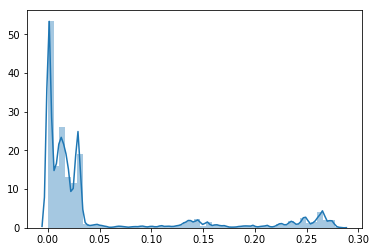

In [287]:
sns.distplot(y_pred_proba[:,1])

In [292]:
y_pred_proba[:,1] > 0.2

array([ True, False,  True, ..., False, False, False])

In [299]:
y_pred_v2 = []
for y_n in y_pred_proba[:,1]: 
    if y_n > 0.1: 
        y_pred_v2.append(1)
    else: 
        y_pred_v2.append(0)

In [300]:
print(accuracy_score(y_test, y_pred_v2))
print(precision_score(y_test, y_pred_v2))
print(recall_score(y_test, y_pred_v2))
print(roc_auc_score(y_test, y_pred_v2))
print(confusion_matrix(y_test, y_pred_v2))

0.8530027903347553
0.23226106143305075
0.8614006374364717
0.8569842998961757
[[191150  33055]
 [  1609  10000]]


In [301]:
y_pred_v2 = []
for y_n in y_pred_proba[:,1]: 
    if y_n > 0.2: 
        y_pred_v2.append(1)
    else: 
        y_pred_v2.append(0)
        
print(accuracy_score(y_test, y_pred_v2))
print(precision_score(y_test, y_pred_v2))
print(recall_score(y_test, y_pred_v2))
print(roc_auc_score(y_test, y_pred_v2))
print(confusion_matrix(y_test, y_pred_v2))

0.9103742780326868
0.31458268452195576
0.6960978551124127
0.808783523127224
[[206598  17607]
 [  3528   8081]]


In [308]:
y_pred_v2 = []
for y_n in y_pred_proba[:,1]: 
    if y_n > 0.14: 
        y_pred_v2.append(1)
    else: 
        y_pred_v2.append(0)
        
print(accuracy_score(y_test, y_pred_v2))
print(precision_score(y_test, y_pred_v2))
print(recall_score(y_test, y_pred_v2))
print(roc_auc_score(y_test, y_pred_v2))
print(confusion_matrix(y_test, y_pred_v2))

0.8790911481082548
0.2651251980101715
0.821776208114394
0.8519175191014645
[[197762  26443]
 [  2069   9540]]


In [303]:
df_2 = pd.DataFrame({
    "y_test": y_test, 
    "y_proba": y_pred_proba[:,1]
})

/Users/lowthe01/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lowthe01/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


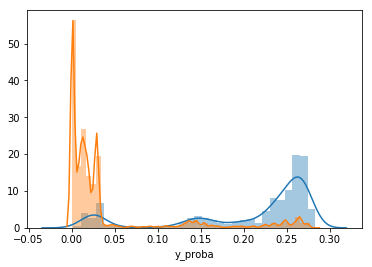

In [307]:
sns.distplot(df_2.loc[df_2['y_test'] == 1, "y_proba"])
sns.distplot(df_2.loc[df_2['y_test'] == 0, "y_proba"])